<a href="https://colab.research.google.com/github/duanasq/learning-ds-public/blob/main/dl-fundamentals/residual_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from torchsummary import summary
from sklearn.model_selection import train_test_split
import matplotlib.animation as animation

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            #print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return train_loss / len(dataloader.dataset)

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader) 
    model.eval()
    test_loss, correct, relative_error = 0, 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            relative_error_temp = abs(y - pred) / abs(y)
            relative_error +=  relative_error_temp.type(torch.float).sum().item()
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    relative_error /= size
    return test_loss
   # relative_error_final = relative_error.type(torch.float).sum().item()/ size
    #correct /= size

In [ ]:
def plot_model(model):
  arr = np.linspace(0, 1, num=500)[:, np.newaxis]
  x = torch.Tensor(arr)
  y = model(x).detach()
 # poly = np.poly1d([1, -28, 322, -1960, 6769, -13132, 13068, -540])
  y_real =  3* x[:,0] - 7#poly(arr)#5*x[:,0]**5 + 4*x[:,0]**4 + 3*x[:,0]**3 + 2*x[:,0]**2 + x[:,0] + 42 #3 * x[:,0] - 7
  #print('plotmodel')
  #print(x,y)
  df = pd.DataFrame(data = {"x": x[:, 0], "y": y[:, 0], "y_real": y_real}).melt(id_vars='x', value_vars=['y', 'y_real'])
  #print(df.head())
  sns.scatterplot(data = df, x='x', y='value', hue='variable')
  plt.show()


In [ ]:

def run_model(model):
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
  print(model)

  epochs = 300
  for t in range(epochs):
      #print(f"Epoch {t+1}\n-------------------------------")
      train(train_dataloader, model, loss_fn, optimizer)
      test(test_dataloader, model, loss_fn)
  print("Done!")
  plot_model(model)

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


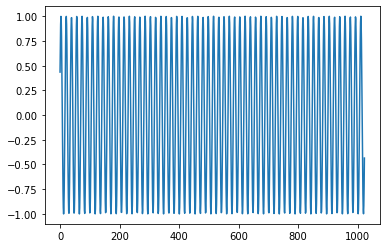

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


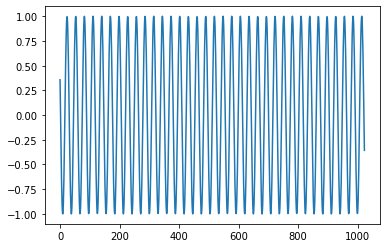

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


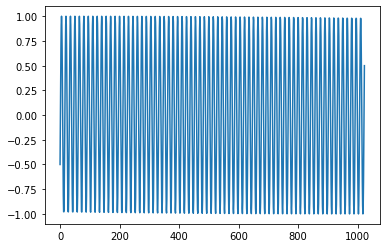

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


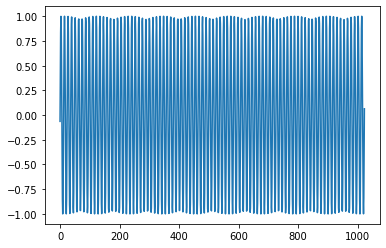

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


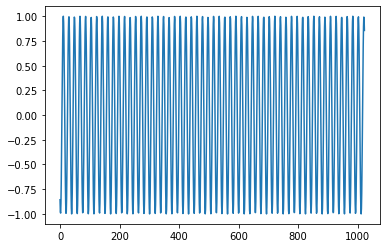

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


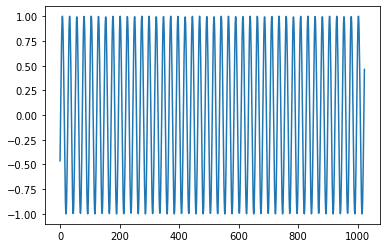

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


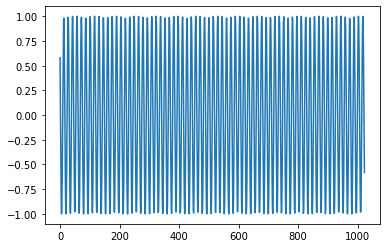

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


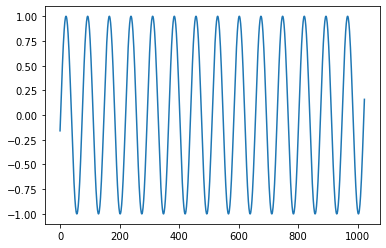

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


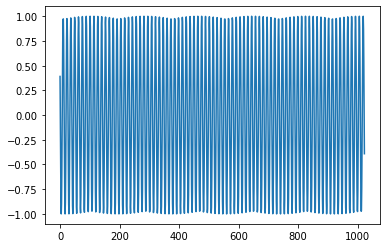

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


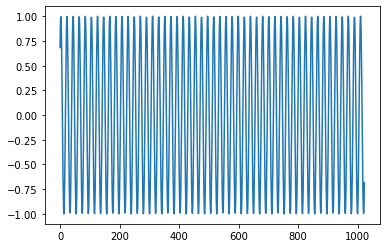

([array([ 0.43488414,  0.72101183,  0.91704784, ..., -0.91704784,
         -0.72101183, -0.43488414]),
  array([ 0.35724848,  0.14908103, -0.0659946 , ...,  0.0659946 ,
         -0.14908103, -0.35724848]),
  array([-0.5000757 , -0.10481883,  0.30854473, ..., -0.30854473,
          0.10481883,  0.5000757 ]),
  array([-0.06358548,  0.44815572,  0.83768512, ..., -0.83768512,
         -0.44815572,  0.06358548]),
  array([-0.85658254, -0.97877674, -0.99163911, ...,  0.99163911,
          0.97877674,  0.85658254]),
  array([-0.4620755 , -0.21962917,  0.03745665, ..., -0.03745665,
          0.21962917,  0.4620755 ]),
  array([ 0.58012453,  0.19266674, -0.22907121, ...,  0.22907121,
         -0.19266674, -0.58012453]),
  array([-0.15922393, -0.07353855,  0.01269418, ..., -0.01269418,
          0.07353855,  0.15922393]),
  array([ 0.39101092, -0.08416776, -0.53985482, ...,  0.53985482,
          0.08416776, -0.39101092]),
  array([ 0.68430838,  0.87200201,  0.97887814, ..., -0.97887814,
       

In [ ]:
def dataset_generate(num_dataset):
  size_image = 1024
  X = []
  Y = []
  for i in range(num_dataset):
    freq = np.random.uniform(low = 0.1, high = 11)
    a = 1 #np.random.randn()
    b = 0 #np.random.randn()
    x = np.linspace(-10*np.pi, 10 * np.pi, size_image) # + np.random.randn(size_image, 1)
    y = a*np.sin(freq *x) + b
    X.append(y)
    Y.append(freq)
    print(x)
    plt.plot(y)
    plt.show()
  return X, Y
dataset_generate(10)


In [ ]:
train_X, train_Y = dataset_generate(1000)

In [ ]:
test_X, test_Y = dataset_generate(100)

In [ ]:
train_tensor_x = torch.Tensor(train_X)
train_tensor_y = torch.Tensor(train_Y)
test_tensor_x = torch.Tensor(test_X)
test_tensor_y = torch.Tensor(test_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  """Entry point for launching an IPython kernel.


In [ ]:
train_dataset = TensorDataset(train_tensor_x, train_tensor_y)
train_dataloader = DataLoader(train_dataset, batch_size=10)
test_dataset = TensorDataset(test_tensor_x, test_tensor_y)
test_dataloader = DataLoader(test_dataset, batch_size=10)
print(len(test_dataloader))
print(len(test_dataloader.dataset))

10
100


In [ ]:
def make_model():
  return nn.Sequential(nn.Linear(1024, 1024), nn.Tanh(), nn.Linear(1024, 1024), nn.Tanh(), nn.Linear(1024, 1), nn.Sigmoid())

In [ ]:
import numpy as np

from matplotlib import pyplot as plt

noise_scale = 0.1

def dataset_generate(num_dataset):
  size_image = 32 * 32
  X = []
  Y = []
  for i in range(num_dataset):
    freq = np.random.uniform(low = 0.1, high = 11)
    a = 1 #np.random.randn()
    b = 0 #np.random.randn()
    x = np.linspace(-10*np.pi, 10 * np.pi, size_image) # + np.random.randn(size_image, 1)
    y = a*np.sin(freq *x) + b

    y += noise_scale*(np.random.random(1024) - 0.5)

    X.append(y)
    Y.append(freq)
    print(x)
    plt.plot(x,y)
    plt.show()

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


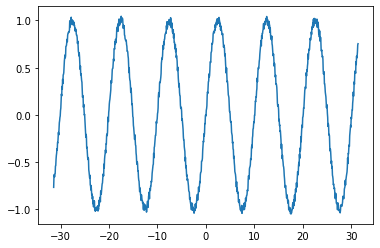

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


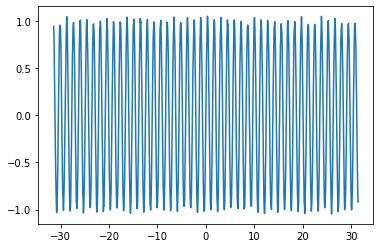

[-31.41592654 -31.35450732 -31.29308811 ...  31.29308811  31.35450732
  31.41592654]


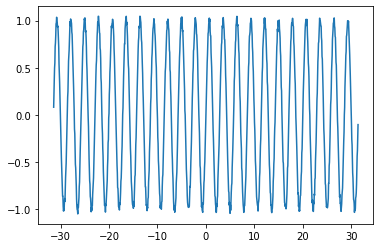

In [ ]:
dataset_generate(3)

In [ ]:
def dataset_generate2(num_dataset):
  noise_scale = 0.1
  feature_size = 1024
  a = 1
  b = 0
  Y = np.random.uniform(low = 0.1, high = 11, size=(num_dataset, 1))
  temp = np.linspace(-10*np.pi, 10 * np.pi, feature_size).reshape(1, feature_size)
  X = np.sin(Y * x) + noise_scale * (np.random.random((num_dataset, feature_size)) - 0.5)
  return X, Y

In [ ]:
Y = np.random.uniform(low = 0.1, high = 11, size=(1024, 1))

In [ ]:
x = np.linspace(-10*np.pi, 10 * np.pi, 1024).reshape(1,1024)

In [ ]:
A = np.sin(Y * x) + 0.1*(np.random.random((1000,1024)) - 0.5)
print(A.shape)


(1000, 1024)


In [ ]:
X,Y = dataset_generate2(5)
print(X.shape)
print(Y.shape)

(5, 1024)
(5, 1)


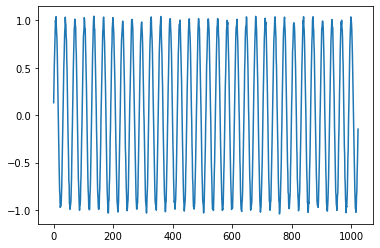

In [ ]:
plt.plot(A[1])